## **Modul 2: Data Analysis – Normal Distribution**

1. Load dataset all_cars.csv yang telah Anda buat, simpan dalam variabel bernama ‘df_car’.\

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df_car = pd.read_csv('all_cars.csv')
df_car

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
22261,Toyota,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
22262,Toyota,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
22263,Toyota,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
22264,Toyota,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


2. Cek distribusi data pada kolom 'mileage' menggunakan graphical summary. Tampilkan skew dan kurtosisnya.

In [6]:
print(df_car['mileage'].skew())
print(df_car['mileage'].kurtosis())


1.7043504776960094
5.2952853473383055


skew > 1, 'mileage' data skewed to the right

kurtosis > 3, 'mileage' leptokurtic

<Axes: xlabel='mileage', ylabel='Count'>

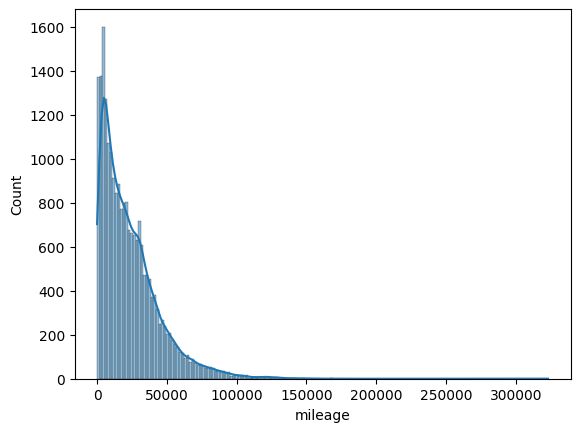

In [9]:
sns.histplot(data = df_car, x = 'mileage', kde = True)

<Axes: xlabel='mileage'>

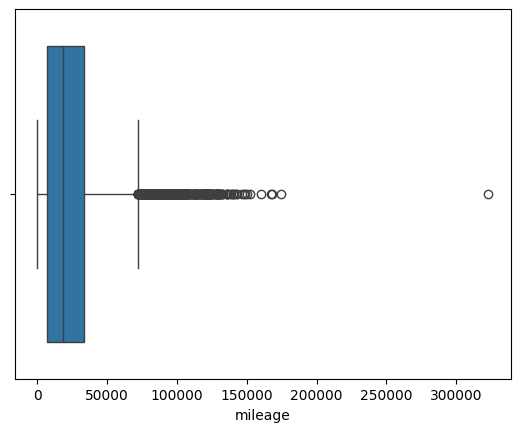

In [10]:
sns.boxplot(data = df_car, x = 'mileage')

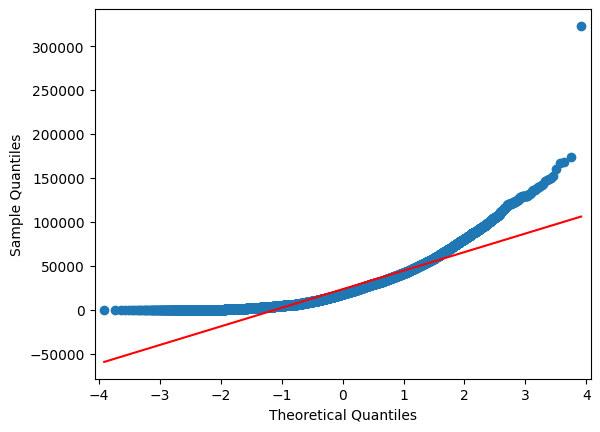

In [15]:
sm.qqplot(data = df_car['mileage'], line = 's')
plt.show()

3. Nilai Mean dan Median dari kolom 'mileage' berbeda jauh. Coba buktikan apakah kolom tersebut 
terdistribusi normal atau tidak dengan menggunakan Kolmogorov Smirnov Test, Lilliefors Test, Shapiro Wilk Test, & D’Agostino and Pearson’s Test!
Simpulkan berdasarkan nilai tersebut.

In [30]:
from scipy import stats as st
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro

In [31]:
stats, pvalue = st.kstest(df_car['mileage'], 'norm')
pvalue # pvalue < 0.5, Ha accepted / Ho rejected

np.float64(0.0)

In [20]:
stats, pvalue = lilliefors(df_car['mileage'])
pvalue # pvalue < 0.5, Ha accepted / Ho rejected

np.float64(0.0009999999999998899)

In [33]:
shapiro_test = st.shapiro(df_car['price'])
pvalue # pvalue < 0.5, Ha accepted / Ho rejected

np.float64(0.0)

In [35]:
# straight importing
stats, pvalue = shapiro(df_car['price'])
pvalue # pvalue < 0.5, Ha accepted / Ho rejected

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22266.
  res = hypotest_fun_out(*samples, **kwds)


np.float64(6.6679230158874665e-90)

In [36]:
stats, pvalue = st.normaltest(df_car['price'])
pvalue # pvalue < 0.5, Ha accepted / Ho rejected

np.float64(0.0)

4. Apa yang dimaksud dengan populasi dan sample? Berikan Contohnya!

population contains the whole data point that fulfill research consdition

sample is the subset of population, taken by random, used to represent the whole population

5. Apa yang dimaksud dengan hipotesis? Apa perbedaan Null Hypothesis (Ho) dan Alternative Hypothesis (Ha)? Berikan contohnya!

hypothesis is a proposed explanation or an educated guess based on the limited evidence and used as a starting point for further investigation

Ho : Null Hypothesis

represents the baseline assumptions where no relationships.

Example : 'There is no relationship between the car mileage and the car price'


Ha : alternative Hypothesis

represents the contradiction of the Null Hypothesis.

Example : 'There is a relationship between the car mileage and the car price'
